## 3.2 사이킷런 첫걸음: 퍼셉트론 훈련

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('클래스 레이블: ', np.unique(y))

클래스 레이블:  [0 1 2]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

##### train_test_split(array, test_size, random_state, shuffle, stratify)
* array: 분할시킬 데이터
* test_size: 테스트 데이터셋의 비율(default = 0.25)
* train_size: 학습 데이터셋의 비율(default = 1-test_size)
* random_state: 데이터 분할 시 셔플이 이루어지기 위한 시드 값
* shuffle: 셔플 여부 설정(default=True)
* stratify: 지정한 data의 비율을 유지

### 계층화가 잘 되었는지 확인

In [10]:
# 잘 섞였나? (계층화가 잘 되었나?)
print('y의 레이블 카운트: ', np.bincount(y))
print('y_train의 레이블 카운트: ', np.bincount(y_train))
print('y_test의 레이블 카운트: ', np.bincount(y_test))

y의 레이블 카운트:  [50 50 50]
y_train의 레이블 카운트:  [35 35 35]
y_test의 레이블 카운트:  [15 15 15]


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

##### 특성 스케일 조정
* StandardScaler(X) : 평균이 0, 표준편차가 1이 되도록 변환
* 학습용 데이터를 입력으로 하여 fit 메서드를 실행하면 분포 모수를 객체 내에 저장
* 학습용 데이터 변환
  * 학습용 데이터를 입력으로 하여 transform 메서드를 실행하면 학습용 데이터를 변환
  * 검증용 데이터를 입력으로 하여 transform 메서드를 실행하면 검증용 데이터를 변환
* 두 과정을 합쳐서 fit_transform 메서드도 사용 가능

In [14]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=50, eta0=0.01, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=50, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=0.001, verbose=0, warm_start=False)

linear_model 모듈에서 Perceptron 클래스를 로드하고 새로운 Perceptron 객체를 생성한 후 fit 메서드를 사용하여 모델을 훈련

### 분류 오차 계산하기
* 잘못 분류된 샘플 개수를 찾거나
* 정확도 계산 (더 많이 사용)
  * 사이킷런의 분류기의 예측 정확도를 계산하는 score 메서드 활용

In [17]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 3


In [23]:
from sklearn.metrics import accuracy_score
print('정확도: %.2f' % ppn.score(X_test_std, y_test))

정확도: 0.93


### 결정 경계 그리기

In [33]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')
        
    # 테스트 샘플을 부각하여 그리기
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')

* enumerate
  * 반복문 사용 시 몇 번째 반복문인지 확인이 필요할 때 사용
  * 인덱스 번호와 컬렉션의 원소를 tuple 형태로 반환

##### 산점도 그리기
* scatter(x, y, s=None, c=None)
  * x, y : x축과 y축을 리스트나 넘파이의 배열같이 iterable한 자료형을 입력받음
  * s : 마커의 크기를 설정
  * c : 마커의 색상을 설정

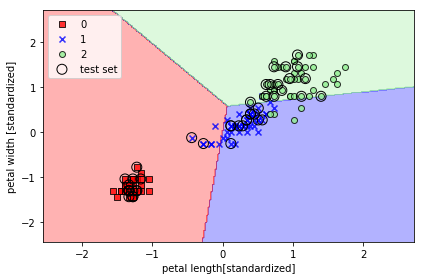

In [34]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined_std,
                     classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

세 개의 붓꽃 클래스는 선형 결정 경계로 완벽하게 분류되지 못함

## 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링

### 3.3.1 로지스틱 회귀의 이해와 조건부 확률
* 퍼셉트론 규칙
  * 머신 러닝 분류 알고리즘을 배우기에 간단
  * 클래스가 선형적으로 구분되지 않을 때 수렴할 수 없음
* 로지스틱 회귀
  * 간단한 선형 이진 분류
  * 회귀이지만 회귀가 아니라 "분류"
  * 다중 분류로 확장 가능 (OvR 방식 사용)
  * 결과가 "범주형"
  * 선형 회귀의 값을 시그모이드의 인풋으로 사용하고, 시그모이드의 아웃풋 값을 범주로 사용
  * 시그모이드 함수의 출력: 특정 샘플이 클래스 1에 속할 "확률"  
   
   
   
출처: https://www.youtube.com/watch?v=zASrGSHoqL4

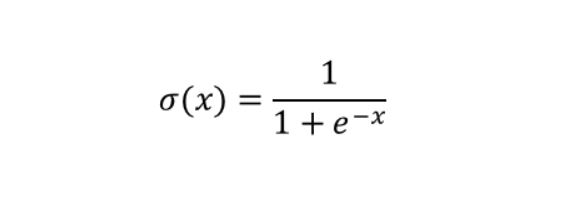

In [8]:
Image("sigmoid.png")

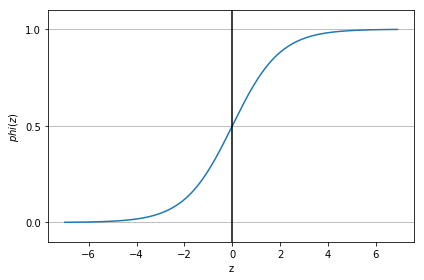

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0+np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$phi (z)$')

# y축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

### 3.3.2 로지스틱 비용 함수의 가중치 학습

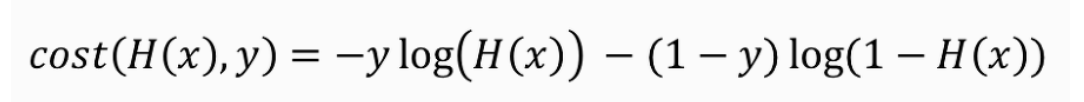

In [9]:
Image("costfunction.png")

H(x)가 시그모이드 함수를 의미

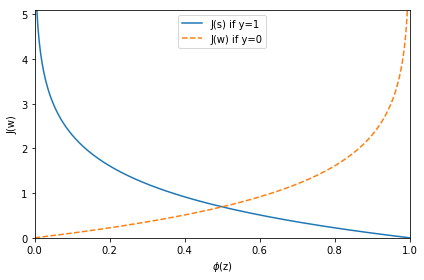

In [12]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1-sigmoid(z))
z = np.arange(-10, 10, 0.1)

phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(s) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

cf) 간단한 2차원 플롯 그리기
* plt.plot(x, y)
  * 이차원 선그래프 그리기
* ylim[ymin, ymax], xlim[xmin, xmax] : 축의 범위 지정
  * plt.axis[xmin, xmax, ymin, ymax]와 같음
* plt.xlabel(x), plt.ylabel(y) : x축과 y축의 이름
* plt.legend : 범례 위치 설정

### 3.3.3 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

로지스틱 회귀의 구현
1. 아달린 구현에서 비용함수 J를 새로운 비용 함수로 바꿈
   (해당 함수로 에포크마다 모든 훈렴 샘플을 분류하는 비용을 계산)
2. 선형 활성화 함수 -> 시그모이드 활성화 함수로 바꿈
3. 임계 함수가 클래스 레이블 -1, 1이 아니고 -> 0, 1을 반환하도록 변경

In [15]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(slef.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            
            #1. 오차 제곱합 대신 로지스틱 비용을 계산
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-ouput))))
            self.cost_.append(cost)
        
        return self
    
    # 최종 입력 계산
    def net_input(self, X):
        return np.dot(X, self.x_[1:]+self.w_[0])
    
    # 2. 로지스틱 시그모이드 활성화 계산
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    # 단3. 위 계단 함수를 사용하여 클래스 레이블을 바환
    def predict(self, X):
        return np.where(self.net_input(X)>=0.5, 1, 0)
        

결정 영역 그리기